In [1]:
import os
import numpy as np
import pydicom  # Make sure pydicom is installed in your environment

# Path to the directory containing the DICOM files
dicom_directory = '/kaggle/input/stage-of-alzheimer/NC/ADNI/002_S_0295/Resting_State_fMRI/2011-06-02_07_56_36.0/I238623'

# Check if the directory exists
if not os.path.exists(dicom_directory):
    print(f"Directory not found: {dicom_directory}")
else:
    print(f"Directory exists: {dicom_directory}")

    # Load the DICOM files
    def load_dicom_series(directory):
        dicom_files = [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith('.dcm')]
        dicom_files.sort()  # Sort the files to maintain order
        images = []
        for dicom_file in dicom_files:
            ds = pydicom.dcmread(dicom_file)
            images.append(ds.pixel_array)  # Append pixel data
        return np.array(images)

    # Load your fMRI data
    fmri_data = load_dicom_series(dicom_directory)
    print(f"Shape of fMRI data: {fmri_data.shape}")  # (time_points, height, width)


Directory exists: /kaggle/input/stage-of-alzheimer/NC/ADNI/002_S_0295/Resting_State_fMRI/2011-06-02_07_56_36.0/I238623
Shape of fMRI data: (6720, 64, 64)


In [2]:
# Function to extract time series from the 4D fMRI data
def extract_time_series(fmri_data):
    # Get the shape of the fMRI data
    time_points, height, width = fmri_data.shape[0], fmri_data.shape[1], fmri_data.shape[2]
    
    # Reshape to a 2D array: (voxels, time_points)
    reshaped_data = fmri_data.reshape(-1, time_points)
    return reshaped_data

# Extract time series from the fMRI data
time_series = extract_time_series(fmri_data)
print(f"Shape of time series data: {time_series.shape}")  # (voxels, time_points)


Shape of time series data: (4096, 6720)


In [3]:
# Function to compute the functional connectivity matrix
def compute_functional_connectivity(time_series):
    # Calculate the correlation matrix
    connectivity_matrix = np.corrcoef(time_series)
    return connectivity_matrix

# Compute the functional connectivity matrix
connectivity_matrix = compute_functional_connectivity(time_series)
print(f"Shape of connectivity matrix: {connectivity_matrix.shape}")  # (voxels, voxels)


Shape of connectivity matrix: (4096, 4096)


# Visualizing the Connectivity Matrix

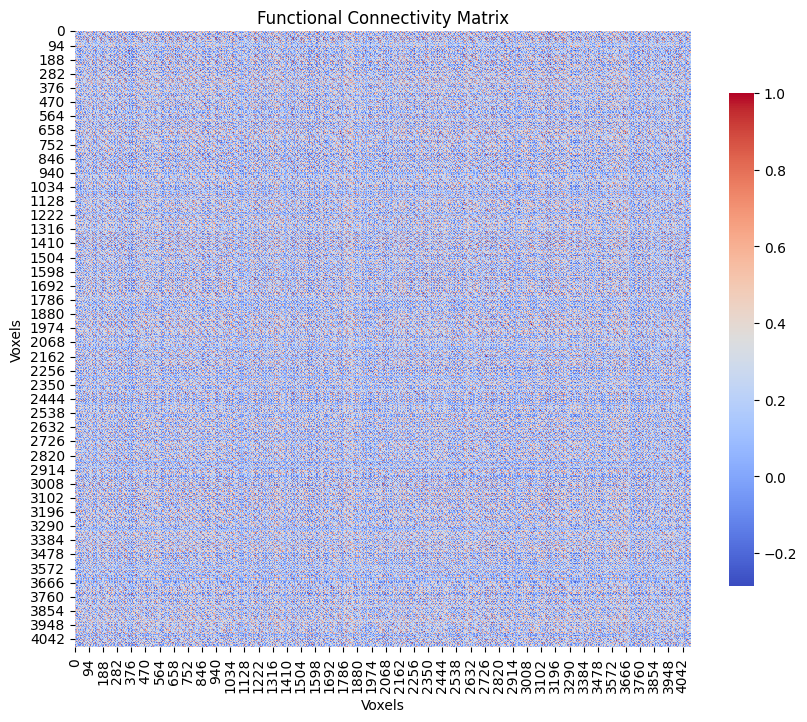

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to visualize the connectivity matrix
def plot_connectivity_matrix(connectivity_matrix):
    plt.figure(figsize=(10, 8))
    sns.heatmap(connectivity_matrix, cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
    plt.title('Functional Connectivity Matrix')
    plt.xlabel('Voxels')
    plt.ylabel('Voxels')
    plt.show()

# Plot the connectivity matrix
plot_connectivity_matrix(connectivity_matrix)


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot and save the connectivity matrix as an image
def save_connectivity_matrix_image(connectivity_matrix, filename='connectivity_matrix.png'):
    plt.figure(figsize=(10, 8))
    sns.heatmap(connectivity_matrix, cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
    plt.title('Functional Connectivity Matrix')
    plt.xlabel('Voxels')
    plt.ylabel('Voxels')
    plt.savefig(filename, dpi=300, bbox_inches='tight')  # Save the image
    plt.close()  # Close the figure to avoid display in Jupyter notebook

# Save the connectivity matrix image
save_connectivity_matrix_image(connectivity_matrix, 'connectivity_matrix.png')


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot and save the connectivity matrix as an image
def save_connectivity_matrix_image(connectivity_matrix, filename='/kaggle/working/connectivity_matrix.png'):
    plt.figure(figsize=(10, 8))
    sns.heatmap(connectivity_matrix, cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
    plt.title('Functional Connectivity Matrix')
    plt.xlabel('Voxels')
    plt.ylabel('Voxels')
    plt.savefig(filename, dpi=300, bbox_inches='tight')  # Save the image directly in the working directory
    plt.close()  # Close the figure to avoid display in Jupyter notebook

# Save the connectivity matrix image
save_connectivity_matrix_image(connectivity_matrix)  # No need for filename argument, it uses default


In [7]:
def compute_functional_connectivity(fmri_data):
    # If fmri_data is 2D (voxels, time_points)
    if len(fmri_data.shape) == 2:
        reshaped_data = fmri_data  # Already in the correct shape
    elif len(fmri_data.shape) == 3:
        # Reshape data to (time, voxels)
        time_points = fmri_data.shape[2]
        x, y = fmri_data.shape[0:2]
        reshaped_data = fmri_data.reshape(x * y, time_points)
    else:
        raise ValueError("Unsupported shape for fmri_data: {}".format(fmri_data.shape))

    # Calculate the correlation matrix
    connectivity_matrix = np.corrcoef(reshaped_data)
    return connectivity_matrix
